<a href="https://colab.research.google.com/github/fff1316169257/581-project/blob/main/ps3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install --upgrade  mapclassify==2.5.0

In [ ]:

import os, zipfile
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import ipywidgets as widgets
from IPython.display import display



from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

from google.colab import data_table
data_table.enable_dataframe_formatter()
import geopandas as gpd

In [ ]:
import time, webbrowser, zipfile


from google.colab import data_table
data_table.enable_dataframe_formatter()

from geopandas.tools import geocode
#! pip install geocoder
from geopy.geocoders import Nominatim
#if you do a lot of geocoding:
#https://developers.google.com/maps/documentation/geocoding/overview

geolocator = Nominatim(user_agent='blah@gmail.com')

from google.colab import files

import folium as f
from folium.plugins import MarkerCluster, HeatMap

#will display all output not just last command
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [ ]:
!pip install mapclassify
import mapclassify

#Part 1#
## Some people are at higher risk of serious illness. Certain respiratory viruses, COVID-19, influenza, and respiratory syncytial virus infection viruses. That viral respiratory disease has affected people’s lives during COVID-19.(2022 - 2023)##

In [ ]:

! wget -q -O  2023_Respiratory_Virus_Response_-_NSSP_Emergency_Department_Visits_-_COVID-19__Flu__RSV__Combined.csv 'https://doc.google.com/uc?export=download&id=1VV0-QMmYYObj5xcBm4h4nX21ePVHPskm&export=download'
data = pd.read_csv('2023_Respiratory_Virus_Response_-_NSSP_Emergency_Department_Visits_-_COVID-19__Flu__RSV__Combined.csv')

<Figure size 1500x800 with 0 Axes>

Text(0.5, 0, 'Week Ending')

Text(0, 0.5, 'Percent of Emergency Department Visits')

Text(0.5, 1.0, 'Percent of Emergency Department Visits by Pathogen Over Time')

(array([19297., 19358., 19417., 19478., 19539., 19601., 19662.]),
 [Text(19297.0, 0, '2022-11'),
  Text(19358.0, 0, '2023-01'),
  Text(19417.0, 0, '2023-03'),
  Text(19478.0, 0, '2023-05'),
  Text(19539.0, 0, '2023-07'),
  Text(19601.0, 0, '2023-09'),
  Text(19662.0, 0, '2023-11')])

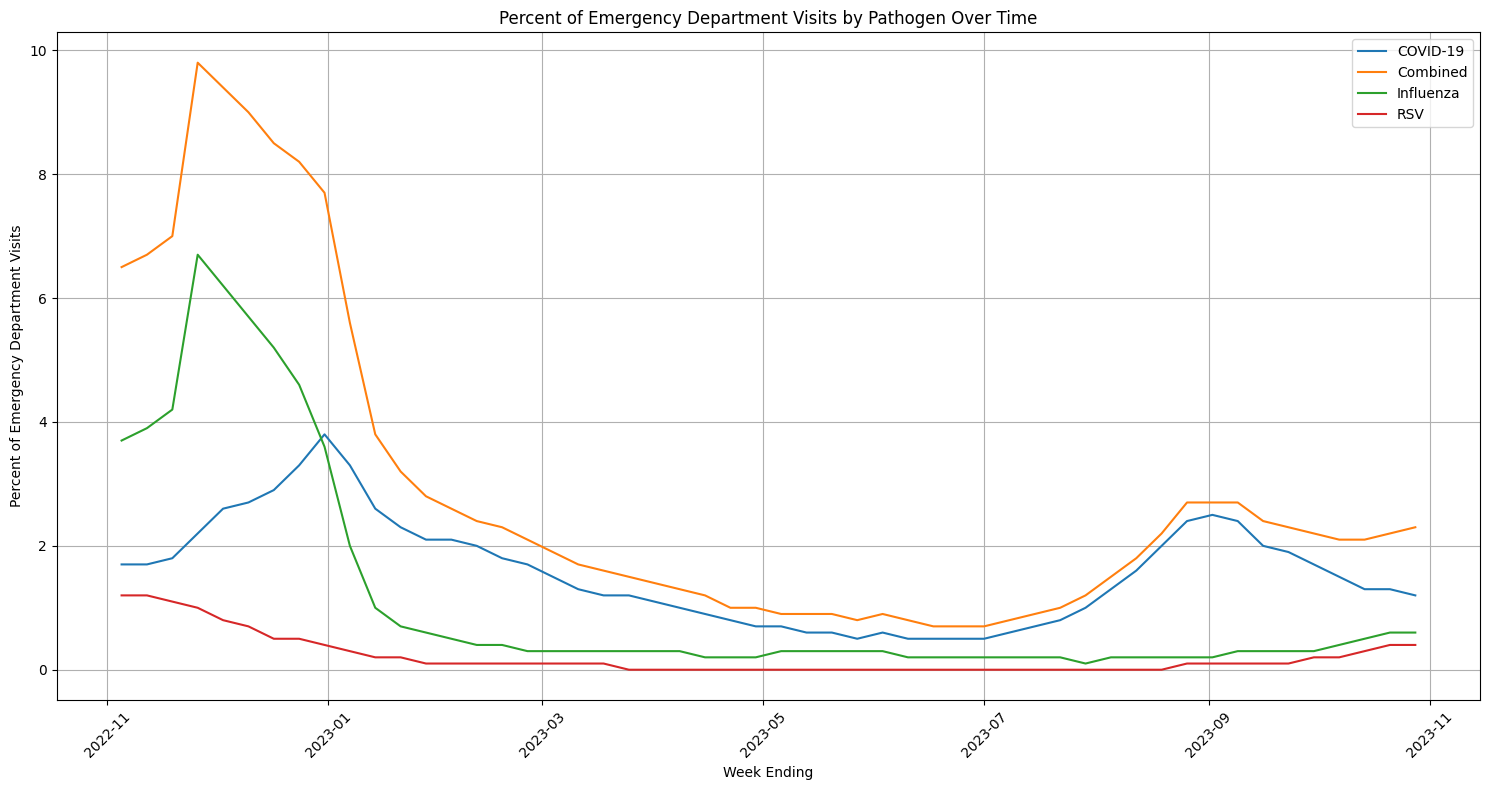

In [ ]:

national_data = data[data['geography'] == 'United States']

pivot_data = national_data.pivot(index='week_end', columns='pathogen', values='percent_visits')

pivot_data.index = pd.to_datetime(pivot_data.index)


pivot_data = pivot_data.sort_index()

plt.figure(figsize=(15, 8))

for pathogen in pivot_data.columns:
    plt.plot(pivot_data.index, pivot_data[pathogen], label=pathogen)

plt.legend()
plt.xlabel('Week Ending')
plt.ylabel('Percent of Emergency Department Visits')
plt.title('Percent of Emergency Department Visits by Pathogen Over Time')
plt.grid(True)
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


Dropdown(description='State:', options=('Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California', 'Colorado', …

Dropdown(description='Year:', options=(2022, 2023), value=2022)

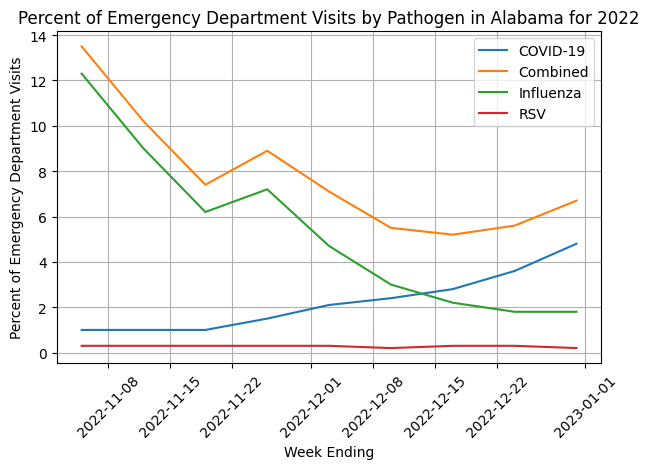

In [ ]:



data['year'] = pd.to_datetime(data['week_end']).dt.year


states = data['geography'].unique()
years = data['year'].unique()


state_dropdown = widgets.Dropdown(options=states, description='State:')
year_dropdown = widgets.Dropdown(options=years, description='Year:')


def update_plot(state, year):
    plt.clf()
    filtered_data = data[(data['geography'] == state) & (data['year'] == year)]

    pivot_data = filtered_data.pivot(index='week_end', columns='pathogen', values='percent_visits')
    pivot_data.index = pd.to_datetime(pivot_data.index)
    pivot_data = pivot_data.sort_index()

    for pathogen in pivot_data.columns:
        plt.plot(pivot_data.index, pivot_data[pathogen], label=pathogen)

    plt.legend()
    plt.xlabel('Week Ending')
    plt.ylabel('Percent of Emergency Department Visits')
    plt.title(f'Percent of Emergency Department Visits by Pathogen in {state} for {year}')
    plt.grid(True)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

display(state_dropdown, year_dropdown)

def on_value_change(change):
    update_plot(state_dropdown.value, year_dropdown.value)

state_dropdown.observe(on_value_change, names='value')
year_dropdown.observe(on_value_change, names='value')

update_plot(state_dropdown.value, year_dropdown.value)



#Part 2#
##The restrictions put in place to limit the spread and impact of Covid-19 have had a wide-ranging impact on people’s lives and how energy is used across the economy.##


Tourist ratio

In [ ]:
! wget -q -O  visitors-transit-covid.csv 'https://doc.google.com/uc?export=download&id=13Kt4N8rRWOTj9_PmnfW5vnhzPPU70nwd&export=download'
trans = pd.read_csv('visitors-transit-covid.csv')

<ipython-input-19-b49821f5dab6>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trans_usa['Day'] = pd.to_datetime(trans_usa['Day'])


<Figure size 1400x700 with 0 Axes>

Text(0.5, 1.0, 'Transit Stations: How did the number of visitors change relative to before the pandemic?')

Text(0.5, 0, 'Date')

Text(0, 0.5, '% Change from Baseline')

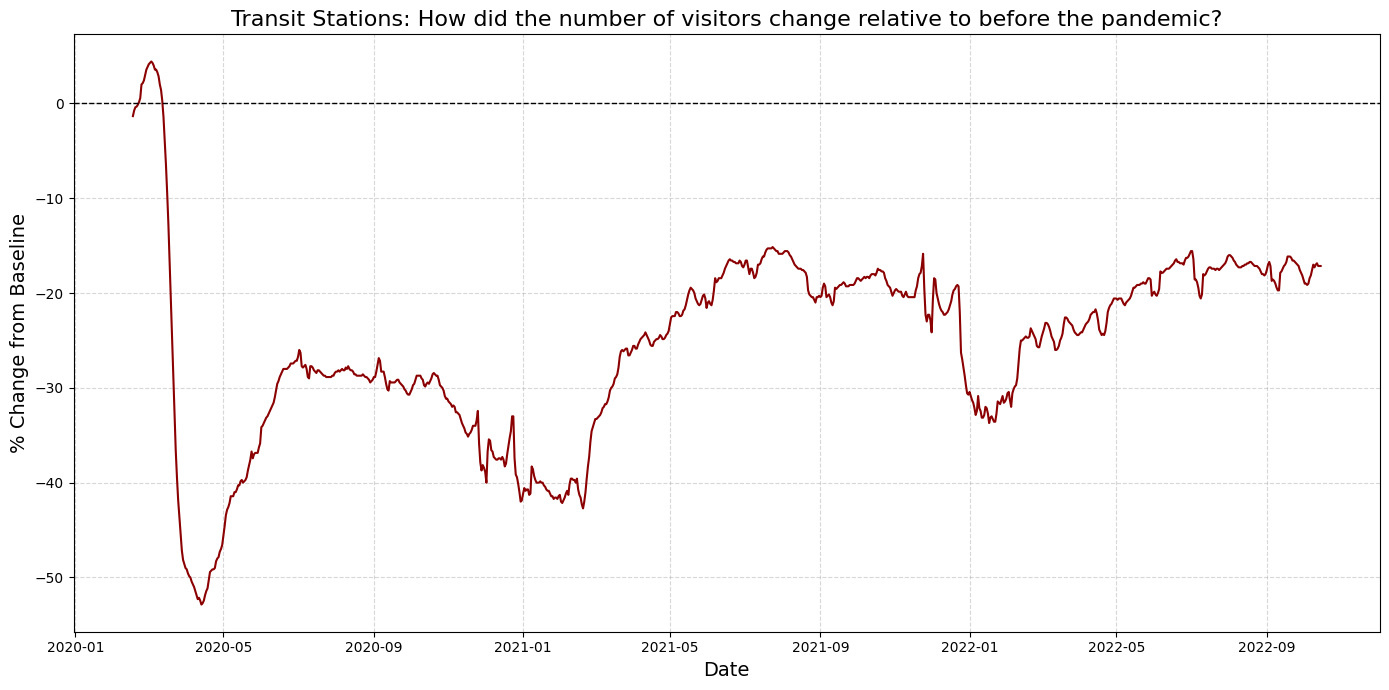

In [ ]:

trans_usa = trans[trans['Entity'] == 'United States']

trans_usa['Day'] = pd.to_datetime(trans_usa['Day'])

plt.figure(figsize=(14, 7))
plt.plot(trans_usa['Day'], trans_usa['transit_stations'], color='darkred', linewidth=1.5)
plt.title('Transit Stations: How did the number of visitors change relative to before the pandemic?', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('% Change from Baseline', fontsize=14)
plt.axhline(0, color='black', linewidth=1, linestyle='--')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()


plt.savefig('path_to_save_figure.png')


plt.show()

Location of transportation stations in the United States

In [ ]:
! wget -q -O  National_Transit_Map_Agencies.csv 'https://doc.google.com/uc?export=download&id=14EiMHmypgqcvtbxpF3HdD3tScYaNDPSP&export=download'
transit_data = pd.read_csv('National_Transit_Map_Agencies.csv')

In [ ]:
import folium
from folium.plugins import MarkerCluster

m = folium.Map(location=[39.50, -98.35], zoom_start=4)

marker_cluster = MarkerCluster().add_to(m)

for idx, row in transit_data.iterrows():
    folium.Marker([row['Y'], row['X']], popup=row['agency_name']).add_to(marker_cluster)


m